# 2.1 Task 01 - Building your data set
You are going to need some data to train your network on. Use NumPy1 to:
    1. Randomly generate 100 numbers between 0 and 1 and save them to an
    array ’x’. These are your input values.
    2. Create an array ’t’. For each entry x[i] in x, calculate x[i]**3-x[i]**2 and save the results to t[i]. These are your targets.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
SIZE = 100
EPOCHS = 1000
LEARNING_RATE = 0.02

# Create dataset class
class Dataset:
    # Initialize data 
    def __init__(self):
        # Array with random numbers
        self.x = np.random.rand(SIZE)
        # Target array
        self.t = self.x**3 - self.x**2 + 1
        # Plot to show how the function is supposed to look like
        plt.scatter(self.x, self.t)
        plt.ylabel('Target')
        plt.xlabel('Data')
        plt.show()

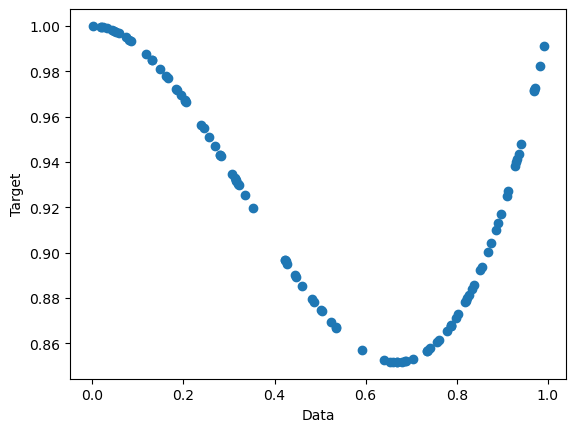

In [12]:
# Create dataset object
numbers_dataset = Dataset()

# 2.2 Task 02 - Perceptrons
Next, implement a simple layer using perceptrons. The layer should be fullyconnected, i.e. each unit in the layer should be connected to every unit in the preceding layer2. You are going to need several of these for your MLP, so you should write a Layer class to be able to easily instantiate as many of them as you need. Your class should have:
    1. A constructor
    • The constructor should accept an integer argument n_units, indicating the number of units in the layer.
    • The constructor should accept an integer argument ’input_units’,
    indicating the number of units in the preceding layer.
    • The constructor should instantiate a bias vector and a weight matrix
    of shape (n inputs, n units). Use random values for the weights and
    zeros for the biases.
    • instantiate empty attributes for layer-input, layer preactivation and
    layer activation

In [ ]:
# Create neural network layer class
class Layer:

    def __init__(self, n_units, input_units, learning_rate):
        np.random.seed(1)
        self.n_units = n_units
        self.input_units = input_units
        self.learning_rate = learning_rate
        self.weights = 2 * np.random.rand(self.input_units, self.n_units) - 1
        self.biases = np.zeros(n_units)
        self.layer_input = None
        self.layer_preactivation = None
        self.layer_activation = None

##### 2. A method called ’forward_step’, which returns each unit’s activation (i.e. output) using ReLu as the activation function.

In [ ]:
# Implement the ReLu activation function
def relu(preactivation):
    return np.maximum(0, preactivation)

def relu_derivative(preactivation):
    if preactivation > 0:  
        return 1
    elif preactivation <= 0:
        return 0

def forward_step(self,input):
    self.layer_input = input
    self.layer_preactivation = np.matmul(self.layer_input, self.weights) + self.biases
    self.layer_activation = relu(self.layer_preactivation)

    return self.layer_activati

##### 3. A method called backward_step, which updates each unit’s parameters (i.e. weights and bias).

In [ ]:
# Updates each unit’s parameters
def backward_step(self, grad_activation):
    d_relu_preactivation = np.asarray(relu_derivative(self.layer_preactivation)) 
    d_preact_gradient_activation = np.multiply(d_relu_preactivation, grad_activation)

    layer_input_T = np.transpose(self.layer_input)

    grad_weights = np.matmul(layer_input_T, d_preact_gradient_activation)
    grad_bias = d_preact_gradient_activation
    weight_T = np.transpose(self.weights)
    grad_input = np.matmul(d_preact_gradient_activation, weight_T)

    # Updating weights and biases
    self.weights = self.weights - self.learning_rate * grad_weights
    self.biases = self.biases - self.learning_rate * grad_bias

    return grad_input

# 2.3 Task 03 - Multi-Layer Perceptron
Create a MLP class which combines instances of your Layer class into into a MLP. Implement two methods:
    • A forward_step method which passes an input through the entire network
    • A backpropagation method which updates all the weights and biases in the network given a loss value.

In [ ]:
# Create multiple layer perceptron class 
class MLP:

    def __init__(self, learning_rate):
    
        self.hidden_layer = Layer(10, 1, learning_rate)
        self.output_layer = Layer(1, 10, learning_rate)

    def forward_step(self, input):
        hidden_layer_output = self.hidden_layer.forward_step(input)
        out = self.output_layer.forward_step(hidden_layer_output)

        return out

    def backpropagation(self, grad_activation):
        grad_input = self.output_layer.backward_step(grad_activation)
        grad_input = self.hidden_layer.backward_step(grad_input)
    

# 2.4 Task 04 - Training
1. Create a MLP with 1 hidden layer consisting of 10 units which all receive a single input, and an output layer with just 1 unit.
2. Train your MLP on your data set for 1000 epochs:
    • Once per epoch, show every data point in your data set to the MLP one at a time.
    • For each data point, have the MLP perform a forward step using the input value and then propagate the error backwards through the network.
    • After each data point, record the loss for later.

In [ ]:
# Training neural network
def train(mlp, x, t):
    l = np.zeros(shape=x.shape)

    for elem in range(x.shape[0]):
        y = mlp.forward_step(np.expand_dims(np.asarray([x[elem]]), axis=0))
        l[elem] = 0.5 * ((y[0][0] - t[elem])**2)
        grad_activation = y[0][0] - t[elem]
        mlp.backpropagation(grad_activation)

    return l

# 2.5 Task 05 - Visualization
Visualize the training progress using Matplotlib. Plot the epochs on the x-axis and the average loss on the y-axis.

In [ ]:
# Shuffle dataset
def shuffle_data(x,t):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    x = x[indices]
    t = t[indices]

    return x, t

In [13]:
mlp = MLP(LEARNING_RATE)

mean_l = []

for elem in range(EPOCHS):
    x, t = shuffle_data(x, t)
    losses = train(mlp, x, t)
    mean_l.append(np.mean(losses))

# Plot the mean loss
plt.plot(range(EPOCHS), mean_l)
plt.xlabel('Epoch')
plt.ylabel('Mean loss')
plt.title('Mean loss per epoch')
plt.show()

# Plot the predicted y-values
y = np.ndarray(shape = x.shape)
for elem in range(x.shape[0]):
    y[elem] = mlp.forward_step(np.expand_dims(np.asarray([x[elem]]), axis=0))

plt.scatter(x, y)
plt.ylabel('Predicted y-value')
plt.xlabel('Data')
plt.title('Learned function')
plt.show()

NameError: name 'MLP' is not defined